# Programming Assignment - 1
Subdivision 1 Goals:
	1) Implement a 2 layer NN, without hidden layer
	2) Train the model with linear data
	3) Visualize the decision boundary learned by this model
Subdivision 2 Goals:
	4) Train this model on non-linear data
	5) Visualize & evaluate the decision boundary learned by this model
Subdivision 4,5,7 Goals:
	6) Visualize the effect of learning rate on NN
	7) L2 Regularization


In [1]:
# Import Python libraries
import numpy as np    
import matplotlib.pyplot as plt
import copy as cpy
import pandas as pd
import time as tm

#1) Implement a 2 layer NN
No Hidden Layer

In [32]:
class NeuralNetwork_2layer:
    """
    This module implements a Neural Netowrk without hidden layers.
    """
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim+1, output_dim) / np.sqrt(input_dim)
        
    def compute_cost(self,X,y):
        a1 = np.append(np.ones([len(X),1]),X,1)
        num_examples = np.shape(X)[0]
        z = np.dot(a1,self.W)
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss
    
    def predict(self,X):
        a1 = np.append(np.ones([len(X),1]),X,1)
        z = np.dot(a1,self.W)
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
    
    def plot_learningRate(self,X,y,num_epochs, alpha, lambda1):
        #Error in each epoch:
        Error = np.zeros(num_epochs,)
        Cost = np.zeros(num_epochs,)
        for epoch in range(0, num_epochs):
            self.one_epoch(X, y, alpha, lambda1)
            p = self.predict(X)
            Error[epoch] = 0.5*(np.sum((y-p)**2) + lambda1*(np.sum(self.W**2)))
            Cost[epoch] = self.compute_cost(X,y)
            #print(Error)
        return Error, Cost;
    
    def one_epoch(self,X,y,alpha, lambda1):
        # Forward propagation
        Count_updates = 0
        a1 = np.append(np.ones([len(X),1]),X,1)
        z = np.dot(a1,self.W)
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
        # Backpropagation
        one_hot_y = np.zeros_like(softmax_scores)
        for i in range(X.shape[0]):
            one_hot_y[i,y[i]] = 1
        beta = softmax_scores - one_hot_y
        # Compute gradients of model parameters
        dtheta = np.dot(np.transpose(a1),beta)
        upd = alpha * (dtheta + lambda1*self.W) 
        # Gradient descent parameter update
        self.W = self.W - upd
        Count_updates = Count_updates + np.sum(upd!=0)
        return Count_updates
    
    def fit(self,X,y,num_epochs,alpha=0.01, lambda1=0):
        for epoch in range(0, num_epochs):
            count_upd = self.one_epoch(X, y, alpha, lambda1)
        return count_upd

In [119]:
def plot_decision_boundary(model, X, y, title, filename):
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

#Load data (Linear)

In [145]:
X = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/Lineary.csv', delimiter=',').astype(np.int64)

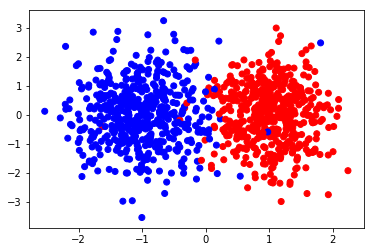

In [146]:
#Plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [147]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
NN = NeuralNetwork_2layer(input_dim, output_dim)
NN1 = cpy.deepcopy(NN)

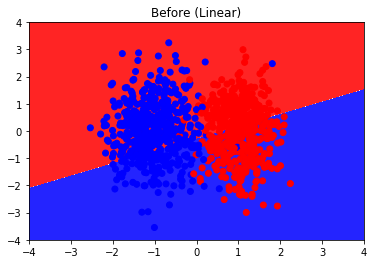

In [121]:
#Plot decision boundary
plot_decision_boundary(NN, X, y, 'Before (Linear)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_before_Linear.png')

# 2) Training the Model (linear)

In [153]:
NN.fit(X,y,1000,alpha=0.001, lambda1=0)

6

#3) Visualization and evaluation of decision boundary learned by the model

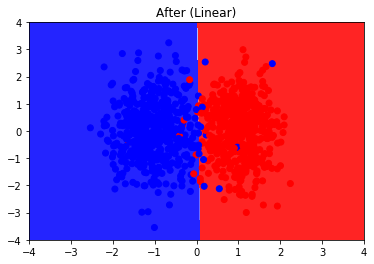

In [154]:
#Plot decision boundary after training
plot_decision_boundary(NN, X, y, 'After (Linear)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_after_Linear.png')

In [155]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = NN.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1.0
acc = acc/len(y_pred)
print ('ACCURACY: ')
print(acc)
print ('CONFUSION MATRIX: ')
print(con_mat)

ACCURACY: 
0.981
CONFUSION MATRIX: 
[[492.  10.]
 [  9. 489.]]


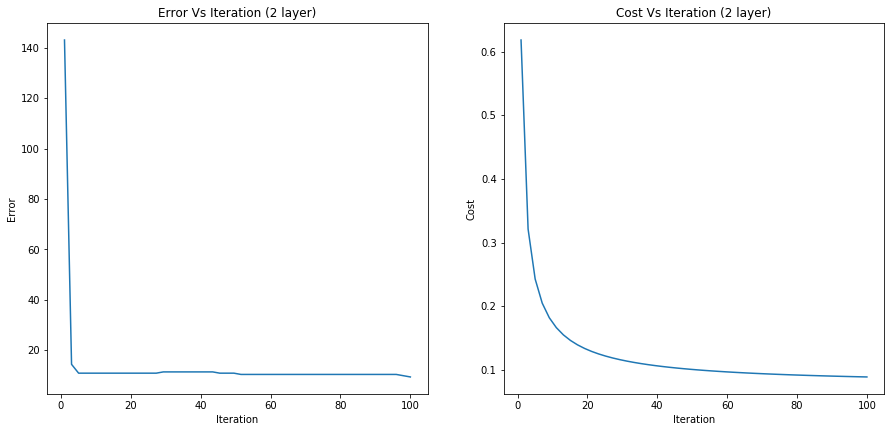

In [151]:
#Plot error w.r.t number of iterations:
X = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/Lineary.csv', delimiter=',').astype(np.int64)
x1 = np.linspace(1, 100, 50)
x2 = np.linspace(1 ,100,50)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
NN1 = NeuralNetwork_2layer(input_dim, output_dim)
f,ax = plt.subplots(1,2,figsize=(15,15))
Error, Cost = NN1.plot_learningRate(X,y,50, 0.001, 0)
plt.subplot(221)
plt.plot(x1, Error)
plt.subplot(222)
plt.plot(x2, Cost)
plt.subplot(221)
#plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Vs Iteration (2 layer)')
#plt.xlim(0,20)
#plt.ylim(-1,40)

plt.subplot(222)
#plt.legend(loc='right')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Vs Iteration (2 layer)')
plt.savefig('/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/LR2_Cost.png')

plt.show()

Load Data (non-linear)

In [124]:
X = np.genfromtxt('/Users/pavithraraghavan/Downloads/DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('/Users/pavithraraghavan/Downloads/DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

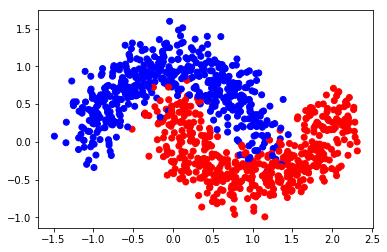

In [125]:
#plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [128]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
NN = NeuralNetwork_2layer(input_dim, output_dim)

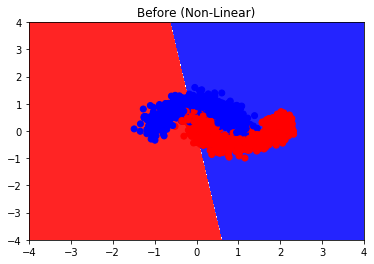

In [129]:
#Plot decision boundary
plot_decision_boundary(NN, X, y,'Before (Non-Linear)', '/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_before_NLinear.png')

#4) Training the Model (non-linear)

In [130]:
NN.fit(X,y,1000,alpha=0.001, lambda1=0)

6

#5) Visualization and evaluation of decision boundary learned by this model

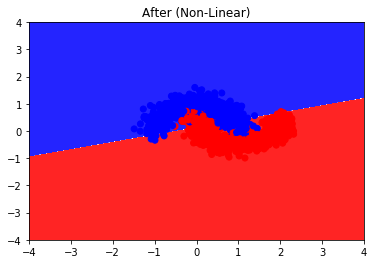

In [131]:
#Plot decision boundary after training
plot_decision_boundary(NN, X, y, 'After (Non-Linear)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_after_NLinear.png')

In [17]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = NN.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1.0
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: ')
print(con_mat)

('ACCURACY: ', 0.875)
CONFUSION MATRIX: 
[[437.  62.]
 [ 63. 438.]]


# 6) Effect of learning rate on NN 

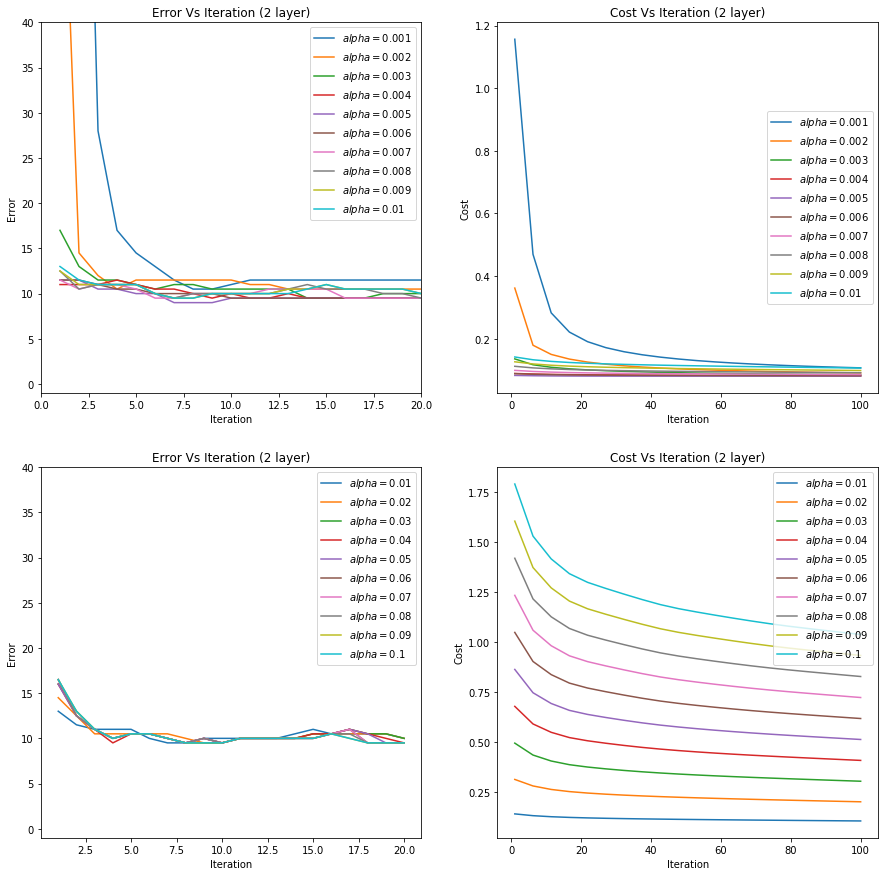

In [162]:
#Plot error w.r.t number of iterations, for different learning rates:
X = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/Lineary.csv', delimiter=',').astype(np.int64)
x1 = np.linspace(1, 20, 20)
x2 = np.linspace(1 ,100,20)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
NN = NeuralNetwork_2layer(input_dim, output_dim)
f,ax = plt.subplots(2,2,figsize=(15,15))
for i in range(1, 11): #10 plots
    NN1 = cpy.deepcopy(NN)
    Error, Cost = NN1.plot_learningRate(X,y,20, 0.001*i, 0)
    plt.subplot(221)
    plt.plot(x1, Error, label='$alpha = {j}$'.format(j=0.001*i))
    plt.subplot(222)
    plt.plot(x2, Cost, label='$alpha = {j}$'.format(j=0.001*i))

for i in range(1, 11): #10 plots
    NN1 = cpy.deepcopy(NN)
    Error, Cost = NN1.plot_learningRate(X,y,20, 0.01*i, 0)
    plt.subplot(223)
    plt.plot(x1, Error, label='$alpha = {j}$'.format(j=0.01*i))
    plt.subplot(224)
    plt.plot(x2, Cost, label='$alpha = {j}$'.format(j=0.01*i))
plt.subplot(221)
plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Vs Iteration (2 layer)')
plt.xlim(0,20)
plt.ylim(-1,40)

plt.subplot(222)
plt.legend(loc='right')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Vs Iteration (2 layer)')

plt.subplot(223)
plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Vs Iteration (2 layer)')
#plt.xlim(0,20)
plt.ylim(-1,40)

plt.subplot(224)
plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Vs Iteration (2 layer)')

plt.savefig('/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/LR_New.png')


plt.show()

#7) L2 Regularization

In [132]:
X = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('/Users/pavithraraghavan/Downloads/Lab3/DATA/Lineary.csv', delimiter=',').astype(np.int64)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [133]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
NN = NeuralNetwork_2layer(input_dim, output_dim)
NN_L2 = cpy.deepcopy(NN)

In [134]:
NN.fit(Xtrain,ytrain,1000,alpha=0.01, lambda1=0)

6

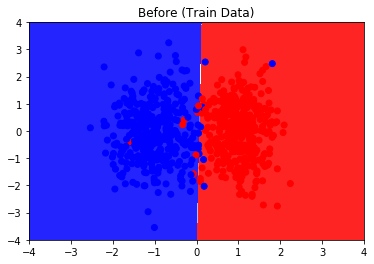

In [135]:
#Plot decision boundary after training
plot_decision_boundary(NN, Xtrain, ytrain, 'Before (Train Data)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_train.png')

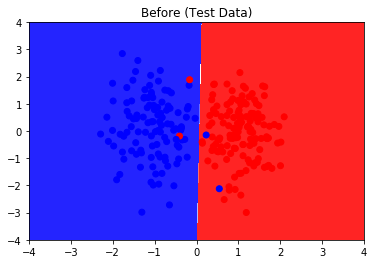

In [136]:
y_pred_test = NN.predict(Xtest)
y_pred_train = NN.predict(Xtrain)
plot_decision_boundary(NN, Xtest, ytest, 'Before (Test Data)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_test.png')

In [137]:
train_acc = (np.sum(y_pred_train==ytrain))*1. / len(y_pred_train)
test_acc = (np.sum(y_pred_test==ytest))*1. / len(y_pred_test)
print("Training accuracy: %0.4f" % (train_acc))
print("Testing accuracy: %0.4f" % (test_acc))

Training accuracy: 0.9800
Testing accuracy: 0.9840


In [138]:
NN_L2.fit(Xtrain,ytrain,1000,alpha=0.01, lambda1=0.03)

6

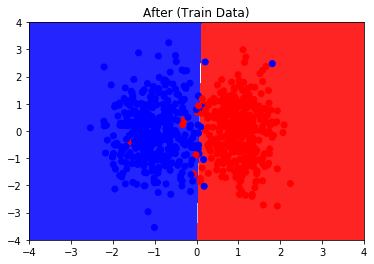

In [139]:
#Plot decision boundary after training
plot_decision_boundary(NN_L2, Xtrain, ytrain,'After (Train Data)','/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_train_L2.png')

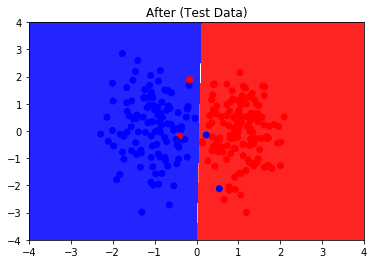

In [140]:
y_pred_test = NN_L2.predict(Xtest)
y_pred_train = NN_L2.predict(Xtrain)
plot_decision_boundary(NN_L2, Xtest, ytest,'After (Test Data)' ,'/Users/pavithraraghavan/Documents/BU/2nd_sem/AI/P1/Plots/2_test_L2.png')

In [141]:
train_acc = (np.sum(y_pred_train==ytrain))*1. / len(y_pred_train)
test_acc = (np.sum(y_pred_test==ytest))*1. / len(y_pred_test)
print("Training accuracy: %0.4f" % (train_acc))
print("Testing accuracy: %0.4f" % (test_acc))

Training accuracy: 0.9800
Testing accuracy: 0.9840
